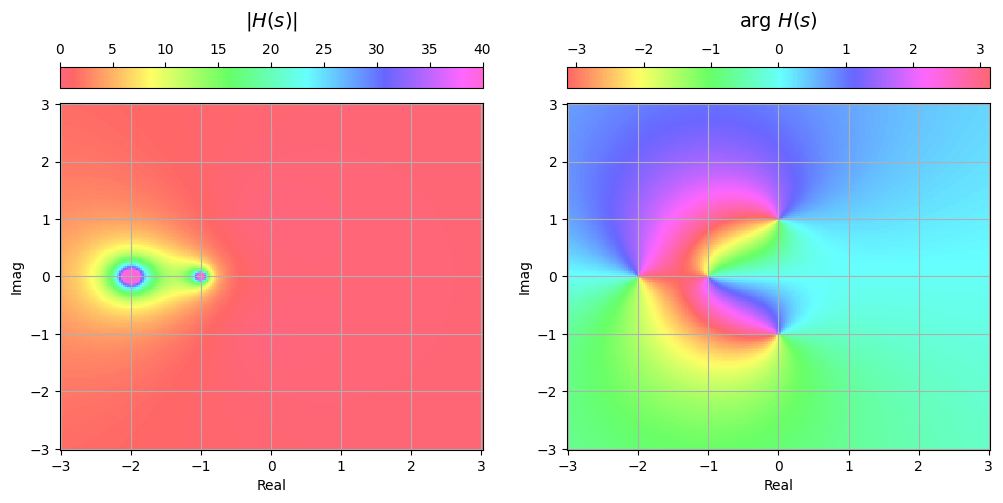

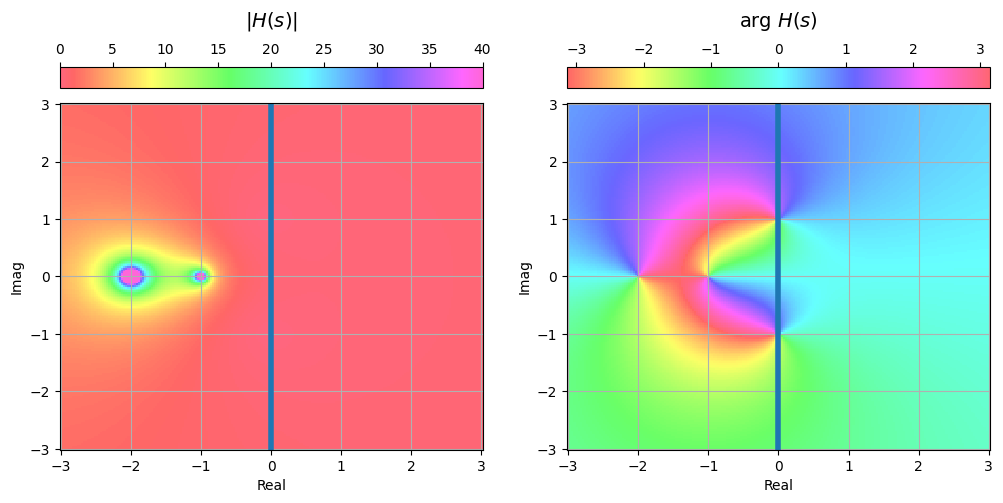

In [1]:
# ================= ISS: Laplace transform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import spectrogram, lfilter, freqz, freqs

#visualizing some LT for slides ...
n1 = 1j
n2 = -1j
p1 = -1
p2 = -2

rerange = np.linspace(-3,3,200)
imrange = np.linspace(-3,3,200)
re, im = np.meshgrid(rerange, imrange)
s = re + 1j*im
Hs = (s - n1) * (s - n2) / (s - p1) / (s-p2)

_, ax = plt.subplots(1,2,figsize=(12,5))
pcm = ax[0].pcolormesh(re, im, np.abs(Hs), vmin=0, vmax=min(40, np.max(np.abs(Hs))), # cut
            cmap=cm.gist_rainbow, alpha=0.6)
plt.colorbar(pcm, ax=ax[0], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[0].grid()
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Imag')
ax[0].set_title('$|H(s)|$', pad=55, fontsize=14)

pcm = ax[1].pcolormesh(re, im, np.angle(Hs), cmap=cm.hsv, alpha=0.6)
plt.colorbar(pcm, ax=ax[1], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[1].grid()
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Imag')
ax[1].set_title('arg $H(s)$', pad=55, fontsize=14)

# and with the line to cut ...
_, ax = plt.subplots(1,2,figsize=(12,5))
pcm = ax[0].pcolormesh(re, im, np.abs(Hs), vmin=0, vmax=min(40, np.max(np.abs(Hs))), # cut
            cmap=cm.gist_rainbow, alpha=0.6)
plt.colorbar(pcm, ax=ax[0], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[0].grid()
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Imag')
ax[0].set_title('$|H(s)|$', pad=55, fontsize=14)
ax[0].plot([0,0],[-3,3],linewidth=4)

pcm = ax[1].pcolormesh(re, im, np.angle(Hs), cmap=cm.hsv, alpha=0.6)
plt.colorbar(pcm, ax=ax[1], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[1].grid()
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Imag')
ax[1].set_title('arg $H(s)$', pad=55, fontsize=14)
ax[1].plot([0,0],[-3,3],linewidth=4)


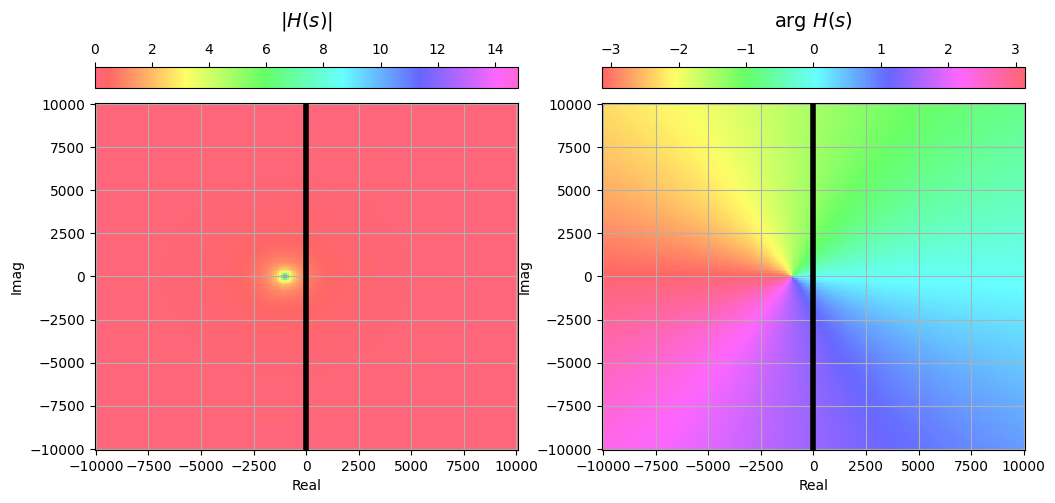

In [2]:
# >>>>>>>>>>>>>>>>> #freqs <<<<<<<<<<<<<<<<<<<<<<<<<
R = 1000   # 1 kOhm
C = 1e-6   # 1 uFarad
RC = R * C
a0 = 1 / RC
a1 = 1
b0 = 1 / RC

om_max = 10000
rerange = np.linspace(-om_max,om_max,200)
imrange = np.linspace(-om_max,om_max,200)
re, im = np.meshgrid(rerange, imrange)
s = re + 1j*im
s[s==0] = 1e-20   # prevents zeros ...
Hs = b0 / (a0 + a1 * s)

_, ax = plt.subplots(1,2,figsize=(12,5))
pcm = ax[0].pcolormesh(re, im, np.abs(Hs), vmin=0, vmax=min(40, np.max(np.abs(Hs))), # cut
            cmap=cm.gist_rainbow, alpha=0.6)
plt.colorbar(pcm, ax=ax[0], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[0].grid()
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Imag')
ax[0].set_title('$|H(s)|$', pad=55, fontsize=14)
ax[0].plot([0,0],[-om_max,om_max],linewidth=4,color='black')

pcm = ax[1].pcolormesh(re, im, np.angle(Hs), cmap=cm.hsv, alpha=0.6)
plt.colorbar(pcm, ax=ax[1], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[1].grid()
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Imag')
ax[1].set_title('arg $H(s)$', pad=55, fontsize=14)
ax[1].plot([0,0],[-om_max,om_max],linewidth=4,color='black')


Text(87.72222222222221, 0.5, 'arg $H(j\\omega)$')

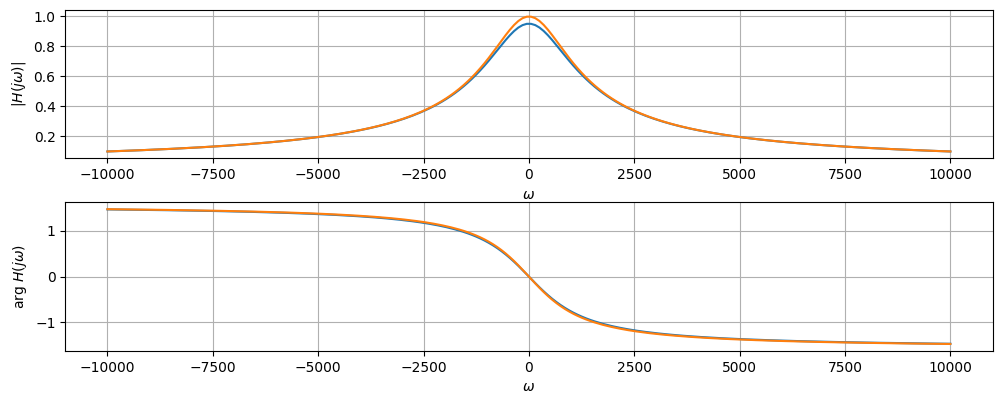

In [3]:
# frequency response by the machine saw and by freqs
om = np.linspace(-om_max,om_max,200)
Hjom = Hs[:,int(Hs.shape[0]/2)]

_,Hjomfreqs = freqs([b0],[a1,a0],om)

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(om,np.abs(Hjom))
ax[0].plot(om,np.abs(Hjomfreqs))
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')

ax[1].plot(om,np.angle(Hjom))
ax[1].plot(om,np.angle(Hjomfreqs))
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')


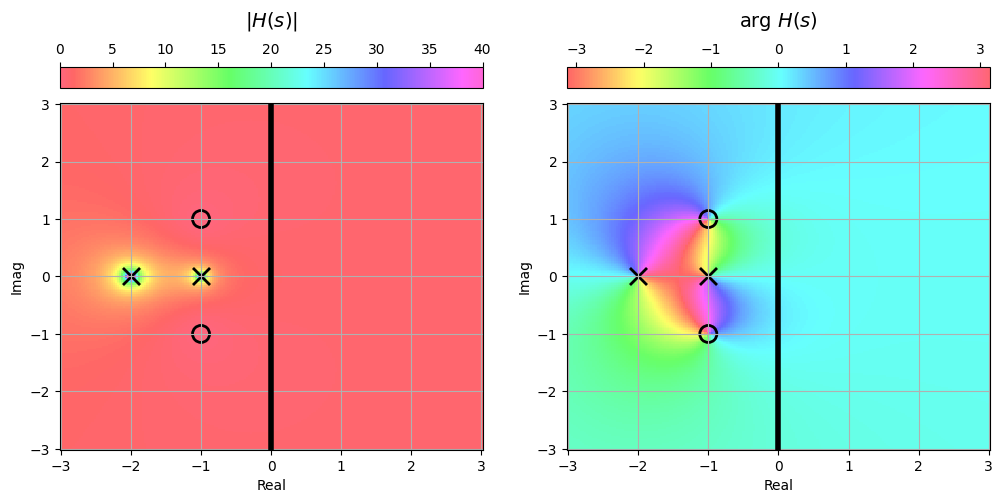

In [4]:
# >>>>>>>>>>>>>>>>> #zeros_poles <<<<<<<<<<<<<<<<<<<<<<<<<
n1 = -1+1j
n2 = -1-1j
p1 = -1
p2 = -2

rerange = np.linspace(-3,3,200)
imrange = np.linspace(-3,3,200)
re, im = np.meshgrid(rerange, imrange)
s = re + 1j*im
Hs = (s - n1) * (s - n2) / (s - p1) / (s-p2)

_, ax = plt.subplots(1,2,figsize=(12,5))
pcm = ax[0].pcolormesh(re, im, np.abs(Hs), vmin=0, vmax=min(40, np.max(np.abs(Hs))), # cut
            cmap=cm.gist_rainbow, alpha=0.6)
plt.colorbar(pcm, ax=ax[0], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[0].grid()
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Imag')
ax[0].set_title('$|H(s)|$', pad=55, fontsize=14)
ax[0].plot([0,0],[-3,3],linewidth=4,color='black')
ax[0].scatter(np.real([n1,n2]), np.imag([n1,n2]), marker='o', facecolors='none', edgecolors='k', s=150, linewidths=2)
ax[0].scatter(np.real([p1,p2]), np.imag([p1,p2]), marker='x', facecolors='k', s=150, linewidths=2)
pcm = ax[1].pcolormesh(re, im, np.angle(Hs), cmap=cm.hsv, alpha=0.6)
plt.colorbar(pcm, ax=ax[1], orientation='horizontal', fraction=0.06, pad=0.04, location='top')
ax[1].grid()
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Imag')
ax[1].set_title('arg $H(s)$', pad=55, fontsize=14)
ax[1].plot([0,0],[-3,3],linewidth=4,color='black')
ax[1].scatter(np.real([n1,n2]), np.imag([n1,n2]), marker='o', facecolors='none', edgecolors='k', s=150, linewidths=2)
ax[1].scatter(np.real([p1,p2]), np.imag([p1,p2]), marker='x', facecolors='k', s=150, linewidths=2)


Text(0, 0.5, 'Imag')

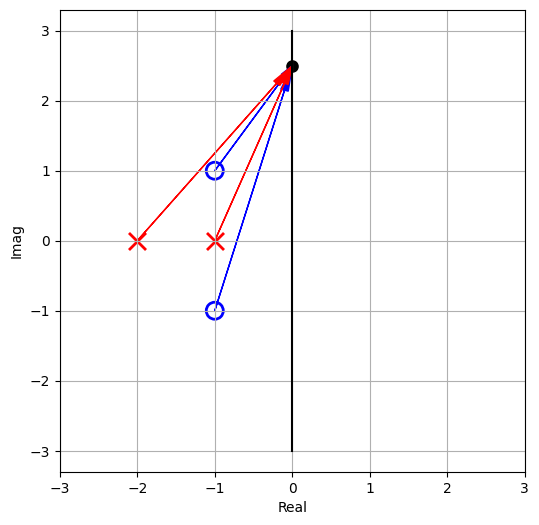

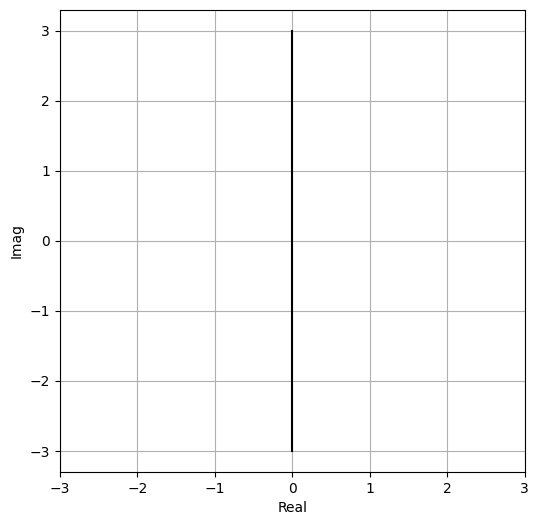

In [5]:
# just poles and zeros and some arrows for visualization ...
jom = 2.5*1j
plt.figure(figsize=(6,6))
plt.plot([0,0],[-3,3],color='black')
plt.gca().grid()
plt.scatter(np.real([n1,n2]), np.imag([n1,n2]), marker='o', facecolors='none', edgecolors='b', s=150, linewidths=2)
plt.scatter(np.real([p1,p2]), np.imag([p1,p2]), marker='x', facecolors='r', s=150, linewidths=2)
plt.scatter(np.real(jom), np.imag(jom), marker='o', facecolors='k', edgecolors='k', s=50, linewidths=2)
for numberfrom in (n1,n2):
    len = np.abs(jom - numberfrom)
    plt.arrow(np.real(numberfrom),np.imag(numberfrom),np.real(jom - numberfrom),np.imag(jom - numberfrom), head_width=0.1, head_length=0.1*len, length_includes_head=True, fc='blue', ec='blue')
for numberfrom in (p1,p2):
    len = np.abs(jom - numberfrom)
    plt.arrow(np.real(numberfrom),np.imag(numberfrom),np.real(jom - numberfrom),np.imag(jom - numberfrom), head_width=0.1, head_length=0.1*len, length_includes_head=True, fc='red', ec='red')
plt.gca().set_xlim(-3,3)
plt.gca().set_xlabel('Real')
plt.gca().set_ylabel('Imag')

plt.figure(figsize=(6,6))
plt.plot([0,0],[-3,3],color='black')
plt.gca().grid()
plt.gca().set_xlim(-3,3)
plt.gca().set_xlabel('Real')
plt.gca().set_ylabel('Imag')
